In [15]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data cleaning and preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip(
    '%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(
    lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work',
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading',
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Function to get user input and make prediction


def predict_grade():
    print("Please enter the following student details:")

    features = {
        'Student_Age': input("Age group (18/19-22/23-27): "),
        'Sex': input("Gender (Male/Female): "),
        'High_School_Type': input("High School Type (State/Private/Other): "),
        'Scholarship': float(input("Scholarship percentage (0-100, without %): ")) / 100,
        'Additional_Work': input("Additional Work (Yes/No): "),
        'Sports_activity': input("Sports Activity (Yes/No): "),
        'Transportation': input("Transportation (Private/Bus): "),
        'Weekly_Study_Hours': float(input("Weekly Study Hours: ")),
        'Attendance': input("Attendance (Always/Never/Sometimes): "),
        'Reading': input("Reading Habit (Yes/No): "),
        'Notes': input("Takes Notes (Yes/No): "),
        'Listening_in_Class': input("Listens in Class (Yes/No): "),
        'Project_work': input("Does Project Work (Yes/No): ")
    }

    input_df = pd.DataFrame([features])
    prediction = model.predict(input_df)
    print(f"\nPredicted Grade: {prediction[0]}")


# Example usage
predict_grade()


Model Accuracy: 0.24
Please enter the following student details:

Predicted Grade: AA


In [16]:
# Student Grade Prediction App using RandomForestClassifier and Streamlit

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pickle

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[ 
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

# Function to take user inputs interactively and predict the grade
def get_user_input():
    # Get inputs from the user
    print("Please enter the following details:")

    Student_Age = input("Age group (18, 19-22, 23-27): ")
    Sex = input("Gender (Male, Female): ")
    High_School_Type = input("High School Type (State, Private, Other): ")
    Scholarship = float(input("Scholarship percentage (0-100): "))
    Additional_Work = input("Additional Work (Yes, No): ")
    Sports_activity = input("Sports Activity (Yes, No): ")
    Transportation = input("Transportation (Private, Bus): ")
    Weekly_Study_Hours = int(input("Weekly Study Hours (0-40): "))
    Attendance = input("Attendance (Always, Never, Sometimes): ")
    Reading = input("Reading Habit (Yes, No): ")
    Notes = input("Takes Notes (Yes, No): ")
    Listening_in_Class = input("Listens in Class (Yes, No): ")
    Project_work = input("Does Project Work (Yes, No): ")

    # Return the inputs as a dictionary
    features = {
        'Student_Age': Student_Age,
        'Sex': Sex,
        'High_School_Type': High_School_Type,
        'Scholarship': Scholarship,
        'Additional_Work': Additional_Work,
        'Sports_activity': Sports_activity,
        'Transportation': Transportation,
        'Weekly_Study_Hours': Weekly_Study_Hours,
        'Attendance': Attendance,
        'Reading': Reading,
        'Notes': Notes,
        'Listening_in_Class': Listening_in_Class,
        'Project_work': Project_work
    }

    return features

# Function to predict grade based on user input
def predict_grade(features):
    # Convert the input dictionary to a DataFrame
    input_df = pd.DataFrame([features])

    # Load the saved model for prediction
    model = pickle.load(open('student_grade_predictor.pkl', 'rb'))

    # Predict the grade
    prediction = model.predict(input_df)
    
    return prediction[0]

# Main: Get user input and predict grade
features = get_user_input()
predicted_grade = predict_grade(features)
print(f"Predicted Grade: {predicted_grade}")


Model Accuracy: 0.24
Please enter the following details:
Predicted Grade: AA


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import streamlit as st
import pickle

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
df['Notes'] = df['Notes'].replace('6', 'No')  # Handle '6' in Notes column
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100  # Convert Scholarship to numeric
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')  # Convert to categories

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters after RandomizedSearchCV
print(f"Best Hyperparameters: {random_search.best_params_}")

# Train the optimized model
best_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion matrix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Streamlit function to input data and predict the grade
def predict_grade():
    st.title("Student Grade Prediction")

    st.write("""
    This app predicts the grade of students based on their study habits, 
    attendance, scholarship status, and other relevant factors.
    """)

    # Input fields for student details
    features = {
        'Student_Age': st.selectbox("Age group", ['18', '19-22', '23-27']),
        'Sex': st.radio("Gender", ['Male', 'Female']),
        'High_School_Type': st.selectbox("High School Type", ['State', 'Private', 'Other']),
        'Scholarship': st.slider("Scholarship percentage (0-100)", 0, 100, step=1),
        'Additional_Work': st.selectbox("Additional Work", ['Yes', 'No']),
        'Sports_activity': st.selectbox("Sports Activity", ['Yes', 'No']),
        'Transportation': st.selectbox("Transportation", ['Private', 'Bus']),
        'Weekly_Study_Hours': st.slider("Weekly Study Hours", 0, 40, step=1, value=10),
        'Attendance': st.selectbox("Attendance", ['Always', 'Never', 'Sometimes']),
        'Reading': st.selectbox("Reading Habit", ['Yes', 'No']),
        'Notes': st.selectbox("Takes Notes", ['Yes', 'No']),
        'Listening_in_Class': st.selectbox("Listens in Class", ['Yes', 'No']),
        'Project_work': st.selectbox("Does Project Work", ['Yes', 'No'])
    }

    # Create a DataFrame from the user input
    input_df = pd.DataFrame([features])

    # Load the saved model for prediction
    model = pickle.load(open('student_grade_predictor.pkl', 'rb'))

    # Predict the grade
    prediction = model.predict(input_df)
    
    st.write(f"Predicted Grade: {prediction[0]}")

# Run the Streamlit app
if __name__ == "__main__":
    predict_grade()


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
2025-05-07 17:32:41.015 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Best Hyperparameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 10, 'classifier__bootstrap': False}
Model Accuracy: 0.28
Confusion Matrix:
[[3 0 0 0 0 0 0 0]
 [3 1 0 0 0 0 0 0]
 [2 2 2 0 0 0 0 0]
 [2 1 0 0 0 0 0 0]
 [2 0 1 0 0 0 0 0]
 [1 0 2 0 1 0 0 0]
 [1 0 0 0 0 0 1 0]
 [3 0 0 0 0 0 0 1]]


2025-05-07 17:32:41.519 
  command:

    streamlit run C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-07 17:32:41.521 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:41.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:41.524 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:41.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:41.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:41.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:41

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Handle missing values and other data preprocessing steps if needed (fill NaN values, drop duplicates, etc.)
df = df.dropna()  # If there are any rows with NaN, they will be dropped. You can also use .fillna() to fill them.

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))  # Use n_jobs=-1 for parallel processing
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Model performance evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

# The next step is to load the model for predictions
# Load the saved model
loaded_model = pickle.load(open('student_grade_predictor.pkl', 'rb'))

# Example prediction function for new data
def predict_new_data(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = loaded_model.predict(input_df)
    return prediction

# Example usage of prediction function
input_example = {
    'Student_Age': '19-22',
    'Sex': 'Female',
    'High_School_Type': 'Private',
    'Scholarship': 75.0,
    'Additional_Work': 'Yes',
    'Sports_activity': 'No',
    'Transportation': 'Private',
    'Weekly_Study_Hours': 20,
    'Attendance': 'Always',
    'Reading': 'Yes',
    'Notes': 'Yes',
    'Listening_in_Class': 'Yes',
    'Project_work': 'Yes'
}

# Make a prediction for the example
prediction = predict_new_data(input_example)
print(f"Predicted Grade for the input example: {prediction[0]}")


Model Accuracy: 0.21
Classification Report:
              precision    recall  f1-score   support

          AA       0.12      0.17      0.14         6
          BA       0.33      0.25      0.29         4
          BB       0.33      0.17      0.22         6
          CB       0.00      0.00      0.00         2
          CC       0.25      0.25      0.25         4
          DC       0.00      0.00      0.00         1
          DD       0.33      0.67      0.44         3
        Fail       0.00      0.00      0.00         3

    accuracy                           0.21        29
   macro avg       0.17      0.19      0.17        29
weighted avg       0.21      0.21      0.20        29

Confusion Matrix:
[[1 1 0 0 1 1 1 1]
 [2 1 0 0 0 0 1 0]
 [2 1 1 1 0 0 1 0]
 [1 0 0 0 1 0 0 0]
 [1 0 0 0 1 1 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 2 0]
 [1 0 1 1 0 0 0 0]]
Predicted Grade for the input example: AA


In [19]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pickle

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) 
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[ 
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

# Function to predict new data
def predict_new_data(input_data):
    """
    Function to predict the grade for new input data based on the trained model.
    """
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Load the saved model
    model = pickle.load(open('student_grade_predictor.pkl', 'rb'))
    
    # Predict the grade
    prediction = model.predict(input_df)
    
    return prediction

# Example input data from the user
input_example = {
    'Student_Age': '19-22',            # Age group
    'Sex': 'Female',                   # Gender (Male/Female)
    'High_School_Type': 'Private',     # High school type (State/Private/Other)
    'Scholarship': 75.0,               # Scholarship percentage (0-100)
    'Additional_Work': 'Yes',          # Whether the student has additional work (Yes/No)
    'Sports_activity': 'No',           # Whether the student is involved in sports activity (Yes/No)
    'Transportation': 'Private',       # Mode of transportation (Private/Bus)
    'Weekly_Study_Hours': 20,          # Weekly study hours (numeric)
    'Attendance': 'Always',            # Attendance status (Always/Never/Sometimes)
    'Reading': 'Yes',                  # Reading habit (Yes/No)
    'Notes': 'Yes',                    # Takes notes during lectures (Yes/No)
    'Listening_in_Class': 'Yes',       # Whether the student listens during class (Yes/No)
    'Project_work': 'Yes'              # Whether the student does project work (Yes/No)
}

# Predict grade for the input example
prediction = predict_new_data(input_example)
print(f"Predicted Grade for the input example: {prediction[0]}")


Model Accuracy: 0.24
Predicted Grade for the input example: AA


In [20]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pickle
import streamlit as st

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) 
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[ 
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

# Function to predict new data
def predict_new_data(input_data):
    """
    Function to predict the grade for new input data based on the trained model.
    """
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Load the saved model
    model = pickle.load(open('student_grade_predictor.pkl', 'rb'))
    
    # Predict the grade
    prediction = model.predict(input_df)
    
    return prediction

# Streamlit function to input data and predict the grade
def predict_grade():
    st.title("Student Grade Prediction")

    st.write("""
    This app predicts the grade of students based on their study habits, 
    attendance, scholarship status, and other relevant factors.
    """)

    # Input fields for student details
    features = {
        'Student_Age': st.selectbox("Age group", ['18', '19-22', '23-27']),
        'Sex': st.radio("Gender", ['Male', 'Female']),
        'High_School_Type': st.selectbox("High School Type", ['State', 'Private', 'Other']),
        'Scholarship': st.slider("Scholarship percentage (0-100)", 0, 100, step=1),
        'Additional_Work': st.selectbox("Additional Work", ['Yes', 'No']),
        'Sports_activity': st.selectbox("Sports Activity", ['Yes', 'No']),
        'Transportation': st.selectbox("Transportation", ['Private', 'Bus']),
        'Weekly_Study_Hours': st.slider("Weekly Study Hours", 0, 40, step=1, value=10),
        'Attendance': st.selectbox("Attendance", ['Always', 'Never', 'Sometimes']),
        'Reading': st.selectbox("Reading Habit", ['Yes', 'No']),
        'Notes': st.selectbox("Takes Notes", ['Yes', 'No']),
        'Listening_in_Class': st.selectbox("Listens in Class", ['Yes', 'No']),
        'Project_work': st.selectbox("Does Project Work", ['Yes', 'No'])
    }

    # Convert the features dictionary to a DataFrame
    input_df = pd.DataFrame([features])

    # Predict the grade for the input data
    prediction = predict_new_data(features)

    st.write(f"Predicted Grade: {prediction[0]}")

# Run the Streamlit app
if __name__ == "__main__":
    predict_grade()


2025-05-07 17:32:43.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Model Accuracy: 0.24


2025-05-07 17:32:43.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 17:32:43.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [21]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pickle

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 'Sports_activity', 
                        'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)


Model Accuracy: 0.24


In [22]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pickle

# Load the dataset (Make sure to update the file path to your actual CSV file)
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 'Sports_activity', 
                        'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

# Now we will manually input data for prediction

# Manually Input the values for each feature
def get_user_input():
    print("Please enter the student details:")
    
    # Manually input the data
    student_age = input("Enter Student Age (18, 19-22, 23-27): ")
    sex = input("Enter Sex (Male/Female): ")
    high_school_type = input("Enter High School Type (State/Private/Other): ")
    scholarship = float(input("Enter Scholarship Percentage (0-100): "))
    additional_work = input("Does the student have Additional Work? (Yes/No): ")
    sports_activity = input("Does the student participate in Sports Activity? (Yes/No): ")
    transportation = input("Enter Transportation Mode (Private/Bus): ")
    weekly_study_hours = float(input("Enter Weekly Study Hours (0-40): "))
    attendance = input("Enter Attendance (Always/Never/Sometimes): ")
    reading = input("Does the student have a Reading Habit? (Yes/No): ")
    notes = input("Does the student take Notes in Class? (Yes/No): ")
    listening_in_class = input("Does the student Listen in Class? (Yes/No): ")
    project_work = input("Does the student do Project Work? (Yes/No): ")
    
    # Convert the inputs into a DataFrame
    input_data = {
        'Student_Age': student_age,
        'Sex': sex,
        'High_School_Type': high_school_type,
        'Scholarship': scholarship,
        'Additional_Work': additional_work,
        'Sports_activity': sports_activity,
        'Transportation': transportation,
        'Weekly_Study_Hours': weekly_study_hours,
        'Attendance': attendance,
        'Reading': reading,
        'Notes': notes,
        'Listening_in_Class': listening_in_class,
        'Project_work': project_work
    }

    input_df = pd.DataFrame([input_data])
    return input_df

# Get user input
user_input = get_user_input()

# Use the trained model to make predictions
prediction = model.predict(user_input)

# Show the predicted grade
print(f"Predicted Grade for the student: {prediction[0]}")


Model Accuracy: 0.24
Please enter the student details:


KeyboardInterrupt: Interrupted by user

Part 1: Importing Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pickle


Part 2: Data Preprocessing

In [ ]:
# Load the dataset (Make sure to update the file path to your actual CSV file)
df = pd.read_csv('Students _Performance _Prediction.csv')

# Data Cleaning and Preprocessing
# Handle '6' in Notes column
df['Notes'] = df['Notes'].replace('6', 'No')

# Convert Scholarship to numerical
df['Scholarship'] = df['Scholarship'].str.rstrip('%').replace('None', '0').astype(float) / 100

# Convert Student_Age to categorical
df['Student_Age'] = df['Student_Age'].apply(lambda x: '18' if x == '18' else '19-22' if x == '19-22' else '23-27')

# Define features and target
X = df.drop(['Grade', 'Student_ID'], axis=1)  # Features
y = df['Grade']  # Target


Part 3: Splitting the Data into Training and Testing Sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Part 4: Preprocessing Pipelines for Numeric and Categorical Features

In [ ]:
# Preprocessing pipeline for numeric and categorical data
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Scale numeric values
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 'Sports_activity', 
                        'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One hot encoding for categorical features
])


Part 5: Combining the Pipelines into a Column Transformer

In [ ]:
# Column transformer to apply different transformations on numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


Part 6: Defining the Model Pipeline

In [ ]:
# Model pipeline that includes preprocessing and RandomForestClassifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Classifier step
])


Part 7: Training the Model

In [ ]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Scholarship',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Student_Age', 'Sex',
                                                   'High_School_Type',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Part 8: Evaluating the Model

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Model Accuracy: 0.24


Part 9: Saving the Trained Model

In [ ]:
# Save the trained model using pickle
with open('student_grade_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)


Part 10: Manual User Input for Prediction

In [23]:
# Now we will manually input data for prediction

# Manually Input the values for each feature
def get_user_input():
    print("Please enter the student details:")
    
    # Manually input the data
    student_age = input("Enter Student Age (18, 19-22, 23-27): ")
    sex = input("Enter Sex (Male/Female): ")
    high_school_type = input("Enter High School Type (State/Private/Other): ")
    scholarship = float(input("Enter Scholarship Percentage (0-100) with out % : "))
    additional_work = input("Does the student have Additional Work? (Yes/No): ")
    sports_activity = input("Does the student participate in Sports Activity? (Yes/No): ")
    transportation = input("Enter Transportation Mode (Private/Bus): ")
    weekly_study_hours = float(input("Enter Weekly Study Hours (0-40): "))
    attendance = input("Enter Attendance (Always/Never/Sometimes): ")
    reading = input("Does the student have a Reading Habit? (Yes/No): ")
    notes = input("Does the student take Notes in Class? (Yes/No): ")
    listening_in_class = input("Does the student Listen in Class? (Yes/No): ")
    project_work = input("Does the student do Project Work? (Yes/No): ")
    
    # Convert the inputs into a DataFrame
    input_data = {
        'Student_Age': student_age,
        'Sex': sex,
        'High_School_Type': high_school_type,
        'Scholarship': scholarship,
        'Additional_Work': additional_work,
        'Sports_activity': sports_activity,
        'Transportation': transportation,
        'Weekly_Study_Hours': weekly_study_hours,
        'Attendance': attendance,
        'Reading': reading,
        'Notes': notes,
        'Listening_in_Class': listening_in_class,
        'Project_work': project_work
    }

    input_df = pd.DataFrame([input_data])
    return input_df

# Get user input
user_input = get_user_input()

# Use the trained model to make predictions
prediction = model.predict(user_input)

# Show the predicted grade
print(f"Predicted Grade for the student: {prediction[0]}")


Please enter the student details:


Predicted Grade for the student: AA


In [26]:
import pandas as pd  # Import pandas library

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score  # Import accuracy score for evaluation

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Preprocessing

# Convert 'Scholarship' percentage to numeric (remove '%' and convert to a fraction)
df['Scholarship'] = df['Scholarship'].replace({'%': '', 'None': '0'}, regex=True).astype(float) / 100

# Handle missing or incorrect data in the 'Notes' column by replacing '6' with 'No'
df['Notes'] = df['Notes'].replace('6', 'No')

# Define the features (X) and target variable (y)
X = df.drop(['Grade', 'Student_ID'], axis=1)  # Features, drop Grade and Student_ID
y = df['Grade']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply OneHotEncoder for categorical columns
])

# Combine both transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply numeric transformer
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformer
    ]
)

# Create a pipeline with preprocessing and Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model by predicting on the test set
y_pred = model.predict(X_test)

# Print the model's accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")




Model Accuracy: 0.24


In [27]:
from sklearn.metrics import accuracy_score
# Predict the grades on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 24.14%


In [28]:
from sklearn.metrics import classification_report
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          AA       0.09      0.33      0.14         3
          BA       0.20      0.25      0.22         4
          BB       0.50      0.33      0.40         6
          CB       0.00      0.00      0.00         3
          CC       0.00      0.00      0.00         3
          DC       0.50      0.25      0.33         4
          DD       0.50      0.50      0.50         2
        Fail       1.00      0.25      0.40         4

    accuracy                           0.24        29
   macro avg       0.35      0.24      0.25        29
weighted avg       0.38      0.24      0.26        29



In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_10424\618199779.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')

# Save the plot to a file
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the plot as a .png file
plt.close()  # Close the plot to free memory


In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')


# Title for the plot
plt.title('Mekdela Amba')

# Save the plot instead of showing it
plt.savefig("mau_blue.png", dpi=300, bbox_inches='tight')
print("Confusion matrix saved as 'confusion_matrix.png'")



Confusion matrix saved as 'confusion_matrix.png'


In [5]:
import pandas as pd

# Load your dataset (make sure the file path is correct)
df = pd.read_csv('Students _Performance _Prediction.csv')

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['Grade', 'Student_ID'], axis=1)
y = df['Grade']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


NameError: name 'y_pred' is not defined

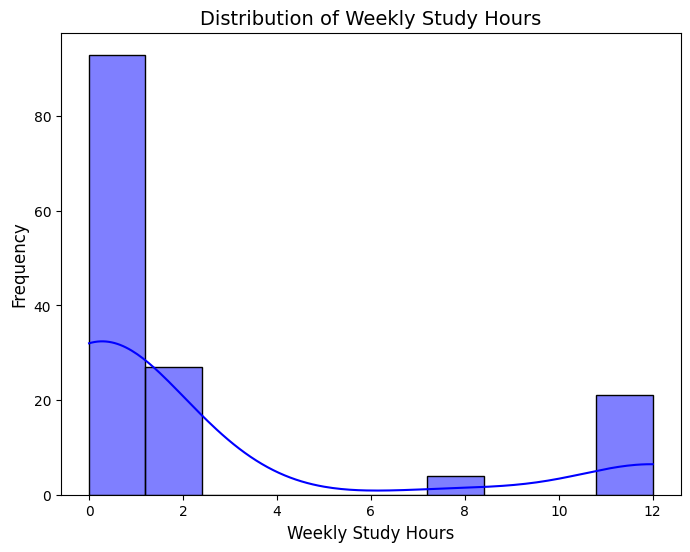

In [9]:
import seaborn as sns  # Import seaborn

plt.figure(figsize=(8, 6))
sns.histplot(df['Weekly_Study_Hours'], kde=True, color='blue', bins=10)
plt.title('Distribution of Weekly Study Hours', fontsize=14)
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


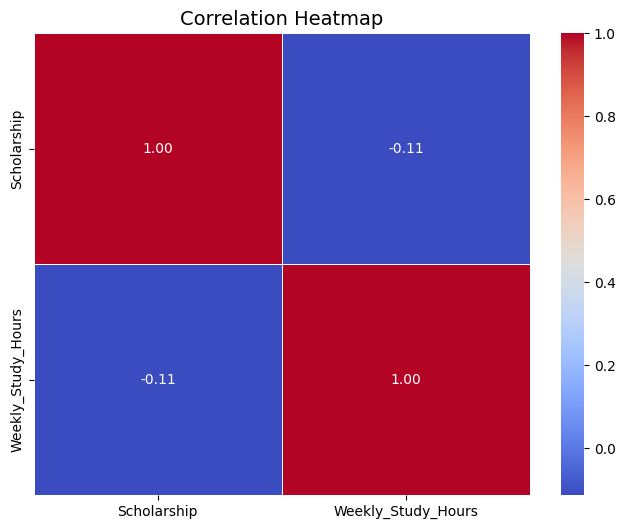

In [11]:
# Clean the 'Scholarship' column: remove '%' and convert to a fraction
df['Scholarship'] = df['Scholarship'].replace({'%': '', 'None': '0'}, regex=True).astype(float) / 100

# Calculate correlation matrix
corr = df[['Scholarship', 'Weekly_Study_Hours']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()



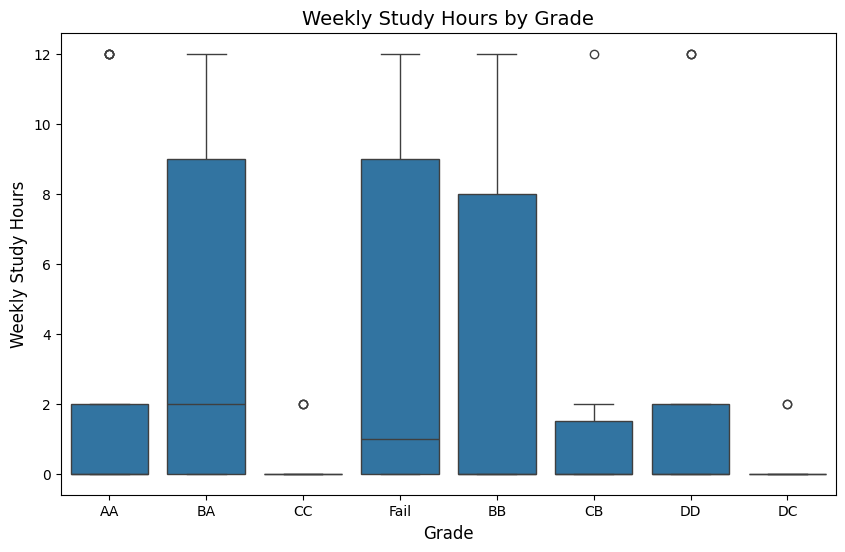

In [13]:
# Boxplot of Weekly Study Hours by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Grade', y='Weekly_Study_Hours')
plt.title('Weekly Study Hours by Grade', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Weekly Study Hours', fontsize=12)
plt.show()


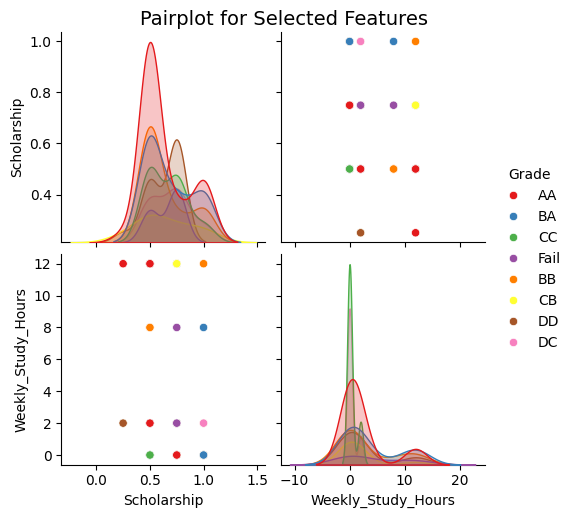

In [14]:
# Pairplot for selected features
sns.pairplot(df[['Scholarship', 'Weekly_Study_Hours', 'Attendance', 'Grade']], hue='Grade', palette='Set1')
plt.suptitle('Pairplot for Selected Features', fontsize=14, y=1.02)
plt.show()


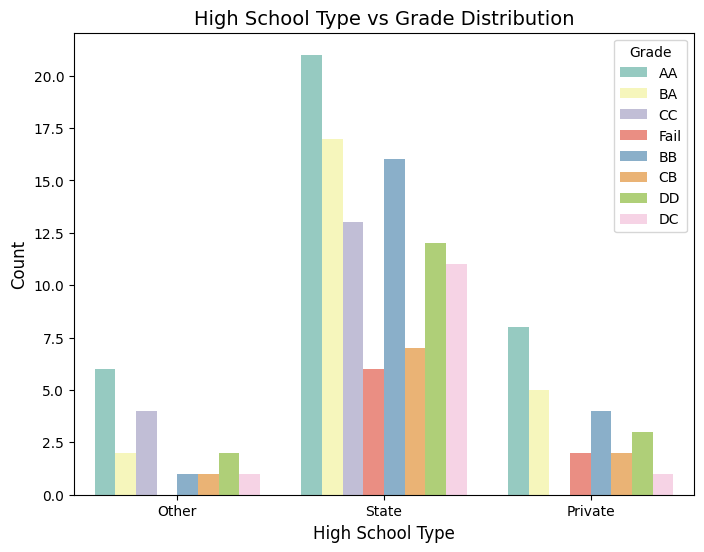

In [15]:
# Countplot of High_School_Type by Grade
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='High_School_Type', hue='Grade', palette='Set3')
plt.title('High School Type vs Grade Distribution', fontsize=14)
plt.xlabel('High School Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [16]:
import pandas as pd  # Import pandas library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score  # Import accuracy score for evaluation
# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')
# Preprocessing
# Convert 'Scholarship' percentage to numeric (remove '%' and convert to a fraction)
df['Scholarship'] = df['Scholarship'].replace({'%': '', 'None': '0'}, regex=True).astype(float) / 100
# Handle missing or incorrect data in the 'Notes' column by replacing '6' with 'No'
df['Notes'] = df['Notes'].replace('6', 'No')
# Define the features (X) and target variable (y)
X = df.drop(['Grade', 'Student_ID'], axis=1)  # Features, drop Grade and Student_ID
y = df['Grade']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define preprocessing steps for numeric and categorical features
numeric_features = ['Scholarship', 'Weekly_Study_Hours']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())  # Scale numeric features
])
categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply OneHotEncoder for categorical columns
])
# Combine both transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply numeric transformer
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformer
    ]
)
# Create a pipeline with preprocessing and Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])
# Train the model
model.fit(X_train, y_train)
# Evaluate the model by predicting on the test set
y_pred = model.predict(X_test)
# Print the model's accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Model Accuracy: 0.24


In [17]:
from sklearn.metrics import accuracy_score
# Predict the grades on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 24.14%


In [18]:
from sklearn.metrics import classification_report
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          AA       0.09      0.33      0.14         3
          BA       0.20      0.25      0.22         4
          BB       0.50      0.33      0.40         6
          CB       0.00      0.00      0.00         3
          CC       0.00      0.00      0.00         3
          DC       0.50      0.25      0.33         4
          DD       0.50      0.50      0.50         2
        Fail       1.00      0.25      0.40         4

    accuracy                           0.24        29
   macro avg       0.35      0.24      0.25        29
weighted avg       0.38      0.24      0.26        29



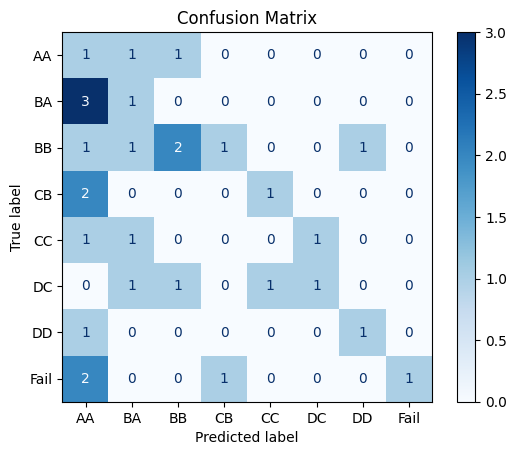

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}
# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score * 100:.2f}%")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Accuracy: 32.79%


In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Use StratifiedKFold to preserve class distribution across folds
cv = StratifiedKFold(n_splits=3)

# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score * 100:.2f}%")


Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Accuracy: 31.02%


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Accuracy: 32.79%


In [23]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Use StratifiedKFold with fewer splits
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=cv_strategy, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Accuracy: 31.89%


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': randint(2, 10)
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 142}
Best Accuracy: 31.05%


In [25]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

# Define hyperparameter distribution
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': randint(2, 10)
}

# Use StratifiedKFold with 3 splits
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=10, cv=cv_strategy, scoring='accuracy', random_state=42
)

# Fit the search
random_search.fit(X_train, y_train)

# Display best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy: {:.2f}%".format(random_search.best_score_ * 100))


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 166}
Best Accuracy: 31.87%


In [26]:
X['Study_Attendance'] = X['Weekly_Study_Hours'] * (X['Attendance'] == 'Always').astype(int)

In [27]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation: {:.2f}%".format(cv_scores.std() * 100))


Cross-Validation Accuracy: 25.52%
Standard Deviation: 4.14%


In [29]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42))
])
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_xgb) * 100))


ModuleNotFoundError: No module named 'xgboost'

In [31]:
from sklearn.linear_model import LogisticRegression
classification_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
classification_model.fit(X_train, y_train)
y_pred_class = classification_model.predict(X_test)
print("Logistic Regression Model Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_class)))



Logistic Regression Model Accuracy: 0.28


In [32]:
from sklearn.linear_model import Lasso
lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', Lasso(alpha=0.01))
])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Model Score: {:.2f}".format(accuracy_score(y_test, y_pred_lasso)))


ValueError: could not convert string to float: 'Fail'

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Replace Lasso with Logistic Regression for classification
logreg_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression
])

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate accuracy
print("Logistic Regression Model Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_logreg)))


Logistic Regression Model Accuracy: 0.28


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('Students _Performance _Prediction.csv')

# Check the column names and the first few rows
print("Columns in DataFrame: ", df.columns)
print("First few rows of DataFrame:\n", df.head())

# Convert 'Scholarship' percentage to numeric (remove '%' and convert to a fraction)
df['Scholarship'] = df['Scholarship'].replace({'%': '', 'None': '0'}, regex=True).astype(float) / 100

# Handle missing or incorrect data in the 'Notes' column by replacing '6' with 'No'
df['Notes'] = df['Notes'].replace('6', 'No')

# Ensure correct handling of the 'Age' column if it contains ranges like '19-22'
def convert_range_to_numeric(value):
    try:
        # Handle ranges like '19-22' and convert to the midpoint (e.g., 20.5 for '19-22')
        if isinstance(value, str) and '-' in value:
            range_values = value.split('-')
            return (float(range_values[0]) + float(range_values[1])) / 2
        return float(value)  # Convert to float if it's a number
    except ValueError:
        return value  # Return the original value if it can't be converted

# Apply the function to the 'Age' column if it contains ranges
if 'Age' in df.columns:
    df['Age'] = df['Age'].apply(convert_range_to_numeric)

# Define features and target variable
X = df.drop(['Grade', 'Student_ID'], axis=1)  # Drop Grade and Student_ID columns
y = df['Grade']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = ['Scholarship', 'Weekly_Study_Hours', 'Age']  # Adjusted for actual columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_features = ['Student_Age', 'Sex', 'High_School_Type', 'Additional_Work', 
                        'Sports_activity', 'Transportation', 'Attendance', 'Reading', 
                        'Notes', 'Listening_in_Class', 'Project_work']  # Adjusted
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply OneHotEncoder for categorical columns
])

# Combine both transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Apply numeric transformer
        ('cat', categorical_transformer, categorical_features)  # Apply categorical transformer
    ]
)

# Create a pipeline with preprocessing and Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model by predicting on the test set
y_pred = model.predict(X_test)

# Print the model's accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Columns in DataFrame:  Index(['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')
First few rows of DataFrame:
   Student_ID Student_Age     Sex High_School_Type Scholarship Additional_Work  \
0   STUDENT1       19-22    Male            Other         50%             Yes   
1   STUDENT2       19-22    Male            Other         50%             Yes   
2   STUDENT3       19-22    Male            State         50%              No   
3   STUDENT4          18  Female          Private         50%             Yes   
4   STUDENT5       19-22    Male          Private         50%              No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private                   0     Always     Yes   Yes   
1              No

ValueError: A given column is not a column of the dataframe